In [21]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import csv 
import re
from py2neo import *
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from datetime import datetime

In [22]:
#读取数据
orign_df = pd.read_csv('AShareEODPrices_20220101_20000807.csv')
date = orign_df.trade_dt
code = orign_df.s_info_windcode
close_p = orign_df.s_dq_adjclose
pct = orign_df.s_dq_pctchange
open_p = orign_df.s_dq_adjopen
high_p = orign_df.s_dq_adjhigh
low_p = orign_df.s_dq_adjlow
volume = orign_df.s_dq_amount
stat = orign_df.s_dq_tradestatuscode
df = pd.concat([date,code, close_p, pct, open_p, high_p, low_p,volume, stat],axis=1)
df=df.replace('.SZ','',regex=True)
df=df.replace('.BJ','',regex=True)
df=df.replace('.SH','',regex=True)
df['day3_mean'] = df.groupby('s_info_windcode')['s_dq_pctchange'].apply(lambda x:x.rolling(3).mean())
df['day7_mean'] = df.groupby('s_info_windcode')['s_dq_pctchange'].apply(lambda x:x.rolling(5).mean())     #为方便计算都用的是5日

In [23]:
#看一眼df
df

,trade_dt,s_info_windcode,s_dq_adjclose,s_dq_pctchange,s_dq_adjopen,s_dq_adjhigh,s_dq_adjlow,s_dq_amount,s_dq_tradestatuscode,day3_mean,day7_mean
0,20220104,835174,24.48,-4.6140,25.61,25.64,23.41,20419.979,-1,NaN,NaN
1,20220104,601880,4.71,2.3121,4.61,4.71,4.61,166816.618,-1,NaN,NaN
2,20220104,000885,22.97,5.6604,21.95,23.18,21.76,176887.999,-1,NaN,NaN
3,20220104,301076,34.66,1.3450,34.20,34.80,34.01,28768.710,-1,NaN,NaN
4,20220104,002334,93.06,-0.2551,93.18,94.02,92.35,130304.710,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
685345,20220805,605033,20.71,0.9823,20.53,20.93,20.53,23598.143,-1,1.472100,-0.40638
685346,20220805,605028,20.44,-0.1014,20.52,20.84,20.04,35886.463,-1,1.511967,-0.43436
685347,20220805,605020,30.31,-0.6956,31.33,31.33,29.38,124354.634,-1,-0.181400,-1.20100
685348,20220805,605060,24.94,1.0961,24.72,25.93,24.44,135967.771,-1,2.517567,3.40556


In [24]:
#将数据储存到xlsx里
#df.to_excel('C:\\Users\\Administrator\\Desktop\\data_new.xlsx')

In [25]:
#查询指定日期和代码的股票信息
startdate = 20220112
enddate = 20220804
code = '002714'
df1 = df[(df.s_info_windcode == code)&(df.trade_dt <= enddate)&(df.trade_dt >= startdate)]
df1 = df1.reset_index(drop=True)
code2 = '300498'
df2 = df[(df.s_info_windcode == code2)&(df.trade_dt <= enddate)&(df.trade_dt >= startdate)]
df2 = df2.reset_index(drop=True)

In [26]:
#看一眼df1
df1

,trade_dt,s_info_windcode,s_dq_adjclose,s_dq_pctchange,s_dq_adjopen,s_dq_adjhigh,s_dq_adjlow,s_dq_amount,s_dq_tradestatuscode,day3_mean,day7_mean
0,20220112,002714,1056.27,1.2010,1048.90,1064.75,1028.62,1726501.466,-1,0.687667,-0.18394
1,20220113,002714,1018.48,-3.5777,1050.74,1076.55,1011.84,1955059.433,-1,-2.287967,-0.45112
2,20220114,002714,1026.78,0.8145,1013.87,1050.00,1010.55,1495788.509,-1,-0.520733,-0.14004
3,20220117,002714,1032.31,0.5386,1026.78,1038.76,1006.50,1313478.873,-1,-0.741533,-1.10216
4,20220118,002714,1028.62,-0.3571,1024.93,1037.65,1011.11,1534225.556,-1,0.332000,-0.27614
...,...,...,...,...,...,...,...,...,...,...,...
131,20220729,002714,1104.15,2.4055,1083.77,1121.38,1071.73,2692317.972,-1,0.847833,0.27788
132,20220801,002714,1088.77,-1.3926,1105.26,1106.56,1070.43,1734463.863,-1,0.423767,0.26466
133,20220802,002714,1075.80,-1.1911,1074.69,1099.89,1059.68,1721012.628,-1,-0.059400,-0.00804
134,20220803,002714,1050.79,-2.3248,1076.36,1089.33,1050.24,1669509.330,-1,-1.636167,-0.44892


In [27]:
#看一眼df2
df2

,trade_dt,s_info_windcode,s_dq_adjclose,s_dq_pctchange,s_dq_adjopen,s_dq_adjhigh,s_dq_adjlow,s_dq_amount,s_dq_tradestatuscode,day3_mean,day7_mean
0,20220112,300498,42.37,0.8734,41.78,43.41,41.29,959624.031,-1,1.174833,0.00912
1,20220113,300498,40.21,-5.0986,42.15,42.78,40.09,883639.137,-1,-2.743600,-0.79956
2,20220114,300498,39.56,-1.6219,39.80,41.33,39.29,1107698.549,-1,-1.949033,-0.63920
3,20220117,300498,39.48,-0.2061,39.54,39.82,38.11,985106.423,-1,-2.308867,-2.01176
4,20220118,300498,40.05,1.4455,39.34,40.21,38.44,700173.595,-1,-0.127500,-0.92154
...,...,...,...,...,...,...,...,...,...,...,...
131,20220729,300498,49.00,4.6582,46.39,49.59,46.39,2082168.045,-1,0.831167,0.65292
132,20220801,300498,48.91,-0.1664,49.02,49.91,48.45,1256118.497,-1,0.676333,0.54238
133,20220802,300498,48.63,-0.5833,48.20,49.73,47.69,1002515.188,-1,1.302833,0.34876
134,20220803,300498,46.94,-3.4786,48.71,48.91,46.88,810032.988,-1,-1.409433,-0.40658


In [28]:
np.corrcoef(df1.s_dq_adjclose, df2.s_dq_adjclose)     #复权收盘价相关系数

array([[1.        , 0.86589366],
       [0.86589366, 1.        ]])

In [29]:
np.corrcoef(df1.day3_mean, df2.day3_mean)             #3D滚动平均相关系数

array([[1.        , 0.81160643],
       [0.81160643, 1.        ]])

In [30]:
np.corrcoef(df1.day7_mean, df2.day7_mean)             #7D滚动平均相关系数

array([[1.        , 0.82827593],
       [0.82827593, 1.        ]])

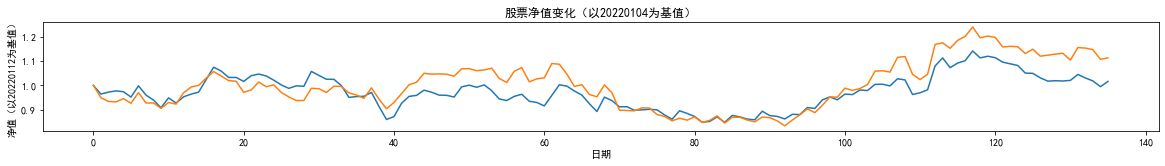

In [31]:
#以指定日期为基值的股价净值
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
i=0                                                                            #在这里调整基值日期，令i=基值日期在上面的df里对应的行索引
base_value_date = df.trade_dt[i]
net_worth_1 = df1.s_dq_adjclose/df1.s_dq_adjclose[i]
net_worth_2 = df2.s_dq_adjclose/df2.s_dq_adjclose[i]
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('股票净值变化（以%s为基值）'%base_value_date)
plt.xlabel('日期')
plt.ylabel('净值（以20220112为基值）')
plt.plot(net_worth_1)
plt.plot(net_worth_2)

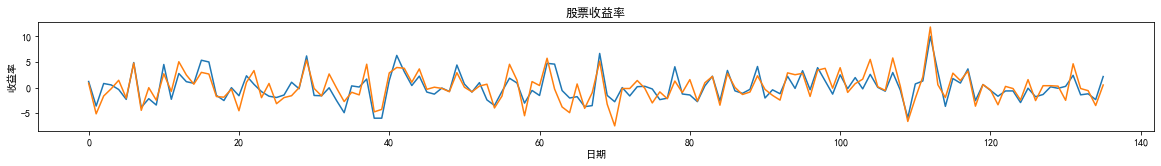

In [32]:
pct_change_1 = df1.s_dq_pctchange
pct_change_2 = df2.s_dq_pctchange
fig = plt.figure(figsize=(20, 2))
plt.title('股票收益率')
plt.xlabel('日期')
plt.ylabel('收益率')
plt.plot(pct_change_1)
plt.plot(pct_change_2)

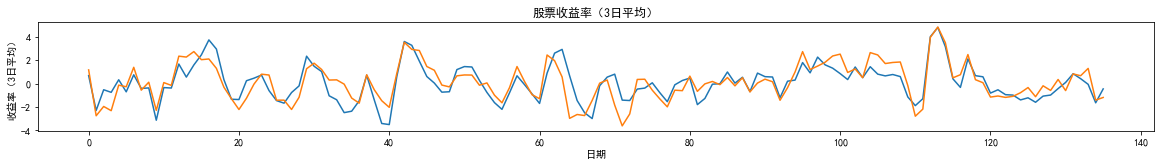

In [33]:
pct_change_day3_1 = df1.day3_mean
pct_change_day3_2 = df2.day3_mean
fig = plt.figure(figsize=(20, 2))
plt.title('股票收益率（3日平均）')
plt.xlabel('日期')
plt.ylabel('收益率（3日平均）')
plt.plot(pct_change_day3_1)
plt.plot(pct_change_day3_2)

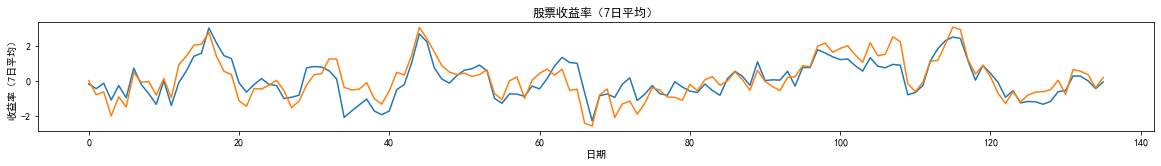

In [34]:
pct_change_day7_1 = df1.day7_mean
pct_change_day7_2 = df2.day7_mean
fig = plt.figure(figsize=(20, 2))
plt.title('股票收益率（7日平均）')
plt.xlabel('日期')
plt.ylabel('收益率（7日平均）')
plt.plot(pct_change_day7_1)
plt.plot(pct_change_day7_2)

In [35]:
#计算净值差
Data_Frame_networth = pd.concat([df1.s_dq_adjclose, df2.s_dq_adjclose],axis=1)
Data_Frame_networth = pd.concat([Data_Frame_networth, net_worth_1],axis=1)
Data_Frame_networth = pd.concat([Data_Frame_networth, net_worth_2],axis=1)
Data_Frame_networth.columns = ['adjclose_1','adjclose_2','net_worth_1','net_worth_2']
Data_Frame_networth['diff'] = Data_Frame_networth['net_worth_1'] - Data_Frame_networth['net_worth_2']
#净值差转正
condition1 = Data_Frame_networth['diff'] > 0
condition2 = Data_Frame_networth['diff'].shift(1) <= 0
Data_Frame_networth.loc[condition1 & condition2, 'net_worth_signal']=1
#净值差转负
condition1 = Data_Frame_networth['diff'] < 0
condition2 = Data_Frame_networth['diff'].shift(1) >= 0
Data_Frame_networth.loc[condition1 & condition2, 'net_worth_signal']=0
#计算涨跌幅
day_list = [1,3,5,10,20]
for i in day_list:
    Data_Frame_networth['%s日后机会收益百分比' %i] = ((Data_Frame_networth['net_worth_1'].shift(-i) - Data_Frame_networth['net_worth_1'])-(Data_Frame_networth['net_worth_2'].shift(-i) - Data_Frame_networth['net_worth_2']))
    Data_Frame_networth
    Data_Frame_networth['%s日后是否有机会收益' %i] = Data_Frame_networth['%s日后机会收益百分比' % i] >0
    Data_Frame_networth['%s日后是否有机会收益' %i].fillna(value=False, inplace=True)

In [36]:
Data_Frame_networth

,adjclose_1,adjclose_2,net_worth_1,net_worth_2,diff,net_worth_signal,1日后机会收益百分比,1日后是否有机会收益,3日后机会收益百分比,3日后是否有机会收益,5日后机会收益百分比,5日后是否有机会收益,10日后机会收益百分比,10日后是否有机会收益,20日后机会收益百分比,20日后是否有机会收益
0,1056.27,42.37,1.000000,1.000000,0.000000,NaN,0.015203,True,0.045525,True,0.025769,True,0.019086,True,0.045371,True
1,1018.48,40.21,0.964223,0.949021,0.015203,1.0,0.023199,True,0.013376,True,0.012793,True,-0.010735,False,0.043584,True
2,1026.78,39.56,0.972081,0.933679,0.038402,NaN,0.007124,True,-0.012632,False,-0.005850,False,-0.055018,False,-0.005378,False
3,1032.31,39.48,0.977316,0.931791,0.045525,NaN,-0.016946,False,-0.017529,False,-0.033565,False,-0.075044,False,-0.000941,False
4,1028.62,40.05,0.973823,0.945244,0.028579,NaN,-0.002810,False,0.003973,True,-0.025960,False,-0.056498,False,-0.009297,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,1104.15,49.00,1.045329,1.156479,-0.111149,NaN,-0.012437,False,-0.001898,False,NaN,False,NaN,False,NaN,False
132,1088.77,48.91,1.030769,1.154354,-0.123586,NaN,-0.005671,False,0.026450,True,NaN,False,NaN,False,NaN,False
133,1075.80,48.63,1.018490,1.147746,-0.129256,NaN,0.016209,True,NaN,False,NaN,False,NaN,False,NaN,False
134,1050.79,46.94,0.994812,1.107859,-0.113047,NaN,0.015912,True,NaN,False,NaN,False,NaN,False,NaN,False


In [37]:
for signal,group in Data_Frame_networth.groupby('net_worth_signal'):
    print(signal)
    print(group[[str(i)+'日后机会收益百分比' for i in day_list]].describe())
    for i  in day_list:
        if signal == 1:
            print('由股票二换到股票一'+str(i)+'天后机会收益大于0概率','\t', float(group[group[str(i) + '日后机会收益百分比']>0].shape[0])/group.shape[0])
        elif signal == 0:
            print('由股票一换到股票二'+str(i)+'天后机会收益大于0概率','\t', float(group[group[str(i) + '日后机会收益百分比']<0].shape[0])/group.shape[0])

0.0
       1日后机会收益百分比  3日后机会收益百分比  5日后机会收益百分比  10日后机会收益百分比  20日后机会收益百分比
count    6.000000    6.000000    6.000000     6.000000     6.000000
mean    -0.003653    0.000381   -0.002342    -0.017534    -0.025705
std      0.010524    0.020312    0.035716     0.053500     0.058441
min     -0.013547   -0.039583   -0.043720    -0.072480    -0.091464
25%     -0.012495    0.000910   -0.028206    -0.064175    -0.070826
50%     -0.005450    0.007804   -0.008862    -0.023520    -0.033793
75%      0.002634    0.011882    0.029850     0.025923     0.023761
max      0.012046    0.014405    0.039291     0.049640     0.045047
由股票一换到股票二1天后机会收益大于0概率 	 0.5
由股票一换到股票二3天后机会收益大于0概率 	 0.3333333333333333
由股票一换到股票二5天后机会收益大于0概率 	 0.5
由股票一换到股票二10天后机会收益大于0概率 	 0.5
由股票一换到股票二20天后机会收益大于0概率 	 0.6666666666666666
1.0
       1日后机会收益百分比  3日后机会收益百分比  5日后机会收益百分比  10日后机会收益百分比  20日后机会收益百分比
count    6.000000    6.000000    6.000000     6.000000     6.000000
mean    -0.001462   -0.008645    0.002369    -0.019276    -0.025799
std 

In [38]:
#计算净值差
Data_Frame_networth = pd.concat([df1.s_dq_adjclose, df2.s_dq_adjclose],axis=1)
Data_Frame_networth = pd.concat([Data_Frame_networth, pct_change_1],axis=1)
Data_Frame_networth = pd.concat([Data_Frame_networth, pct_change_2],axis=1)
Data_Frame_networth.columns = ['adjclose_1','adjclose_2','pct_change_1','pct_change_2']
Data_Frame_networth['diff'] = Data_Frame_networth['pct_change_1'] - Data_Frame_networth['pct_change_2']
#波动率差转正,产生卖出信号
condition1 = Data_Frame_networth['diff'] > 0
condition2 = Data_Frame_networth['diff'].shift(1) <= 0
Data_Frame_networth.loc[condition1 & condition2, 'pct_change_signal']=1
#波动率差转负,产生买入信号
condition1 = Data_Frame_networth['diff'] < 0
condition2 = Data_Frame_networth['diff'].shift(1) >= 0
Data_Frame_networth.loc[condition1 & condition2, 'pct_change_signal']=0
#计算涨跌幅
day_list = [1,3,5,10,20]
for i in day_list:
    Data_Frame_networth['%s日后机会收益百分比' %i] = ((Data_Frame_networth['adjclose_1'].shift(-i) - Data_Frame_networth['adjclose_1'])/Data_Frame_networth['adjclose_1']-(Data_Frame_networth['adjclose_2'].shift(-i) - Data_Frame_networth['adjclose_2'])/Data_Frame_networth['adjclose_2'])
    Data_Frame_networth
    Data_Frame_networth['%s日后是否有机会收益' %i] = Data_Frame_networth['%s日后机会收益百分比' % i] >0
    Data_Frame_networth['%s日后是否有机会收益' %i].fillna(value=False, inplace=True)

In [39]:
for signal,group in Data_Frame_networth.groupby('pct_change_signal'):
    print(signal)
    print(group[[str(i)+'日后机会收益百分比' for i in day_list]].describe())
    for i  in day_list:
        if signal == 1:
            print('由股票一换到股票二'+str(i)+'天后机会收益大于0概率','\t', float(group[group[str(i) + '日后机会收益百分比']>0].shape[0])/group.shape[0])
        elif signal == 0:
            print('由股票二换到股票一'+str(i)+'天后机会收益大于0概率','\t', float(group[group[str(i) + '日后机会收益百分比']<0].shape[0])/group.shape[0])

0.0
       1日后机会收益百分比  3日后机会收益百分比  5日后机会收益百分比  10日后机会收益百分比  20日后机会收益百分比
count   31.000000   31.000000   30.000000    29.000000    27.000000
mean    -0.005323   -0.002673   -0.008731    -0.013716    -0.022294
std      0.013388    0.028507    0.038264     0.051892     0.073789
min     -0.029921   -0.050209   -0.070756    -0.105956    -0.151748
25%     -0.012307   -0.022041   -0.033126    -0.059515    -0.082051
50%     -0.004650   -0.007788   -0.021334    -0.005969    -0.040772
75%      0.004098    0.018219    0.012417     0.017641     0.048211
max      0.016595    0.079882    0.081611     0.068485     0.117534
由股票二换到股票一1天后机会收益大于0概率 	 0.5806451612903226
由股票二换到股票一3天后机会收益大于0概率 	 0.6129032258064516
由股票二换到股票一5天后机会收益大于0概率 	 0.6129032258064516
由股票二换到股票一10天后机会收益大于0概率 	 0.6451612903225806
由股票二换到股票一20天后机会收益大于0概率 	 0.5483870967741935
1.0
       1日后机会收益百分比  3日后机会收益百分比  5日后机会收益百分比  10日后机会收益百分比  20日后机会收益百分比
count   31.000000   30.000000   30.000000    28.000000    26.000000
mean     0.002344   -0.0085